In [1]:
from functools import partial

import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice, plot_timeseries
from superfv.initial_conditions import square
from superfv.tools.norms import linf_norm

In [2]:
ic = partial(square, bounds=(1, 2), vx=2, vy=1, P=1)
ic_passives = dict(passive1=lambda x, y, z, t, *, xp: xp.sin(2 * xp.pi * x))
N = 128
p = 3
n_steps = 10

In [3]:
sim1 = EulerSolver(ic=ic, ic_passives=ic_passives, nx=N, ny=N, p=p)
sim1.run(n=n_steps)

Step #10 @ t=1.13e-02 | dt=1.13e-03 | min(rho)=8.95e-01, min(P)=1.00e+00 | E_cons=0.00e+00 | (ran in 0.79s)


In [4]:
sim2 = EulerSolver(ic=ic, ic_passives=ic_passives, nx=N, ny=N, p=p, cupy=True)
sim2.run(n=n_steps)

Step #10 @ t=1.13e-02 | dt=1.13e-03 | min(rho)=8.95e-01, min(P)=1.00e+00 | E_cons=0.00e+00 | (ran in 0.65s)


/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.496094
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.496094
  warnings.warn(


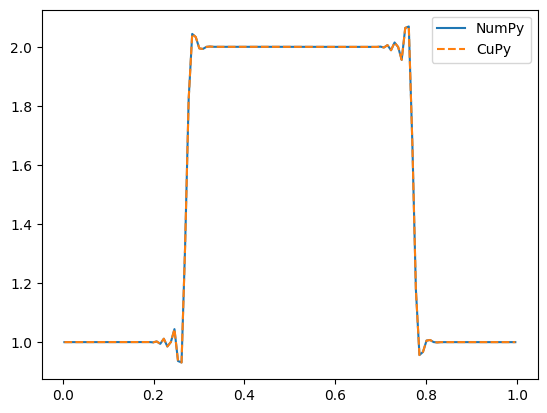

In [5]:
fig, ax = plt.subplots()

plot_1d_slice(sim1, ax, "rho", y=0.5, cell_averaged=True, label="NumPy")
plot_1d_slice(sim2, ax, "rho", y=0.5, cell_averaged=True, label="CuPy", linestyle="--")

ax.legend()

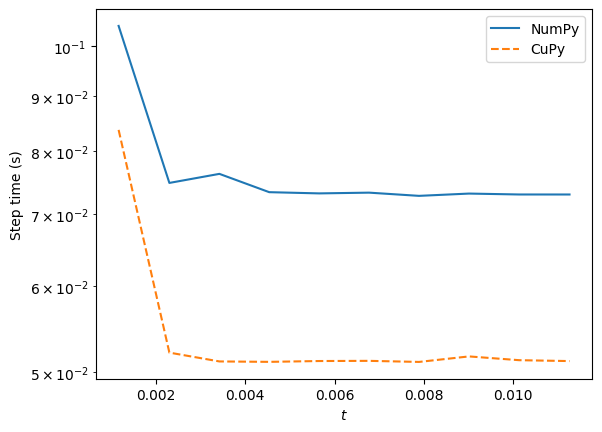

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$t$")
ax.set_ylabel("Step time (s)")
ax.set_yscale("log")

plot_timeseries(sim1, ax, "step_time", label="NumPy")
plot_timeseries(sim2, ax, "step_time", label="CuPy", linestyle="--")

ax.legend()

In [7]:
print(f"Error: {linf_norm(sim2.snapshots[-1]["u"] - sim1.snapshots[-1]["u"])}")

Error: 7.105427357601002e-15
